In [11]:
import numpy as np
from generate_solver_dynamic import get_forces_solver_dynamic
from python_sim_utils import   plotter, plot_pajecka, compute_objective
import matplotlib.pyplot as plt
import InterpolateTrack
import yaml

table generated with npoints =  2453


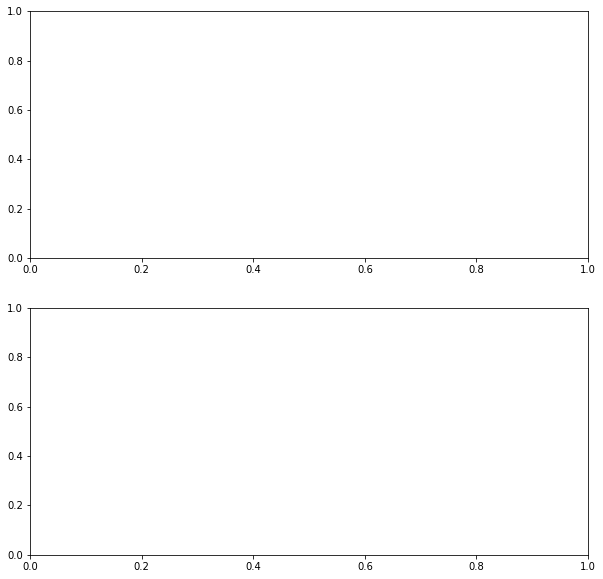

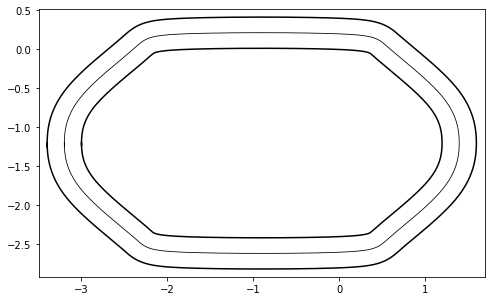

In [13]:
paramfile = "parameters/modelparams.yaml"
with open(paramfile) as file:
        params = yaml.load(file, Loader= yaml.FullLoader)
lf = params['lf'] #[m]
lr = params['lr'] #[m]
lencar = lf+lr
r = 0.2
track_lu_table, smax = InterpolateTrack.generatelookuptable("tracks/indi500xd")
trk_plt = plotter(track_lu_table, smax, r, lencar)
trk_plt.plot_track()

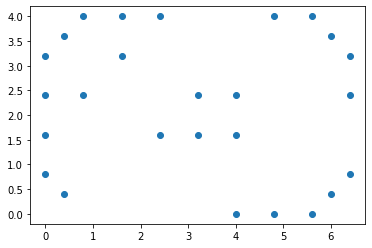

In [3]:
trackx = 8*np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, \
                  0.8 ,0.5 ,0.8 ,0.8, 0.75, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0 ]) 
tracky = 8*np.array([0.05, 0.3, 0.4, 0.2, 0.2, 0.0, 0.0, 0.0, 0.05, \
                  0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.5, 0.3, 0.3, 0.5, 0.5, 0.5, 0.45, 0.4, 0.3, 0.2, 0.1 ]) 
waypoints = np.vstack([trackx,tracky]).T
plt.scatter(trackx, tracky)
np.savetxt('tracks/sample_track.csv', waypoints, delimiter = ', ')

In [3]:
a = np.array([1,2,3,4,4,5,6,6,7,8,9])
b = np.delete(a,[2,3,4,5])

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib

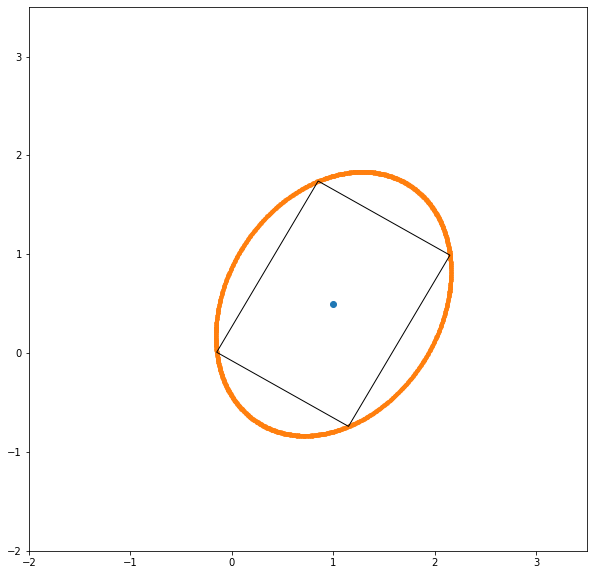

In [49]:
deg2rad = 3.14159/180
rad2deg = 1/deg2rad
phi_ob = 60 * deg2rad
lob = 2 
wob = 1.5 
xob = 1
yob = 0.5

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
tr = matplotlib.transforms.Affine2D().rotate_deg_around(xob, yob, phi_ob*rad2deg)
ts = ax.transData
t = tr + ts

obst = patches.Rectangle((xob-lob/2, yob-wob/2),lob, wob,\
        linewidth=1,edgecolor='k',facecolor='none', transform= t)
obst = ax.add_patch(obst)
ax.scatter(xob,yob)
ax.set_xlim([-2,3.5])
ax.set_ylim([-2,3.5])

def implicit_ellipse(x,y,xc,yc,phi, a, b):
    dx = x-xc
    dy = y-yc
    s = np.sin(phi)
    c = np.cos(phi)
    return (1/a**2)*np.square(c*dx+s*dy)+(1/b**2)*np.square(s*dx-c*dy)

x = np.linspace(-1,3, 1000)
y = np.linspace(-1,3, 1000)
coords = []
for idx1 in range(len(x)):
    for idx2 in range(len(y)):
        coords.append(np.array([x[idx1], y[idx2]]))
coords = np.array(coords)
scalar = np.sqrt(2)
funcvals = implicit_ellipse(coords[:,0], coords[:,1], xob, yob, phi_ob, scalar*lob/2 , scalar*wob/2)
idx = np.where(funcvals<1.02)
coords = coords[idx]
idx = np.where(funcvals[idx]>0.98)
coords = coords[idx]
ax.scatter(coords[:,0],coords[:,1], s = 1)

In [20]:
coords.shape


(10000, 2)

In [25]:
idx = np.where(funcvals<1.1)
idx = np.where(funcvals[idx1]>0.9)

In [4]:
import casadi
import numpy as np
import yaml
from dynamics import dynamics_simulator


modelparams = "parameters/modelparams.yaml"
Tf = 1.5
N = 35
Ts = Tf/N
x0 = np.array([3,4, 0, 1.0, 0.1, 0, 0.2, -0.1, 3])
u = np.array([-5, -1, 0.2])
dynamics_1n = dynamics_simulator(modelparams, Ts, x0, 1)
dynamics_3n = dynamics_simulator(modelparams, Ts, x0, 3)
dynamics_30n = dynamics_simulator(modelparams, Ts, x0, 30)
dynamics_40n = dynamics_simulator(modelparams, Ts, x0, 40)

x1n = dynamics_1n.tick(u)
x3n = dynamics_3n.tick(u)
x30n = dynamics_30n.tick(u)
x40n = dynamics_40n.tick(u)

In [7]:
x3n

array([ 3.04263118e+00,  4.00147286e+00, -1.15924820e-02,  9.80879439e-01,
       -3.51592294e-03, -6.64111267e-01, -1.42857143e-02, -1.42857143e-01,
        3.00857143e+00])

In [6]:
x40n

array([ 3.04263127e+00,  4.00147338e+00, -1.15992982e-02,  9.80880414e-01,
       -3.52881727e-03, -6.63762638e-01, -1.42857143e-02, -1.42857143e-01,
        3.00857143e+00])

In [26]:
def integrate(Ts,f,x0,u):
    k1 = f(x0,u).__array__().reshape(-1,)
    k2 = f(x0 + Ts/2 * k1, u).__array__().reshape(-1,)
    k3 = f(x0 + Ts/2 * k2, u).__array__().reshape(-1,)
    k4 = f(x0 + Ts * k3, u).__array__().reshape(-1,)
    return x0 + 1/6 * Ts*(k1 + 2* k2 + 2*k3 + k4).reshape(-1,)



print("x0 = ", x0)
xend = integrate(Ts, f, x0, u)
print("xend = ", xend)

x0 =  [ 3.   4.   0.   1.   0.1  0.   0.2 -0.1  3. ]
xend =  [ 3.01999351e+00  4.00128844e+00 -1.68692705e-03  9.97440759e-01
  3.57579239e-02 -2.17942062e-01  1.00000000e-01 -1.20000000e-01
  3.00400000e+00]


In [23]:
k1 = f(x0,u).__array__().reshape(-1,)
k2 = f(x0 + Ts/2 * k1, u).__array__().reshape(-1,)
k3 = f(x0 + Ts/2 * k2, u).__array__().reshape(-1,)
k4 = f(x0 + Ts * k3, u).__array__().reshape(-1,)

In [28]:
thetaend = 3+ Ts * 0.2

In [30]:
0.2-Ts*5


0.1

In [8]:
a = np.array([1,2,3,4,5,6])

In [9]:
a[:2]

array([1, 2])

In [2]:
import numpy as np

a = np.array([[1,2,3,4,5],[2,4,5,6,7],[3,4,5,6,7],[4,4,5,6,7]])
a

array([[1, 2, 3, 4, 5],
       [2, 4, 5, 6, 7],
       [3, 4, 5, 6, 7],
       [4, 4, 5, 6, 7]])

In [3]:
b = a[0,:]
b

array([1, 2, 3, 4, 5])

In [8]:
for idx in b:
    print(idx)

1
2
3
4
5


In [7]:
trackx = np.array([-3.2,
-3,
-2.4,
-1.8,
0,
0.6,
1.2,
1.4,
1.2,
0.6,
0,
-1.8,
-2.4,
-3])

tracky = np.array([-1.2,
-1.8,
-2.4,
-2.6,
2.6,
-2.4,
-1.8,
-1.2,
-0.6,
0,
0.2,
0.2,
0,
0.6 ])


array([4, 4, 4])

In [4]:
vars2plot = ['ddot', 'deltadot', 'thetadot', 'posx',  'omega', 'd', 'delta']
zvars = ['ddot', 'deltadot', 'thetadot', 'posx', 'posy', 'phi', 'vx', 'vy', 'omega', 'd', 'delta', 'theta']

indx = [1,2,3]

import numpy as np

In [5]:
a = np.array([0,4,5,76,7])
a[indx]

array([ 4,  5, 76])